In [57]:
def matrixplot(start_date,end_date,type,flag=True): 
    # Configure plotting in Jupyter
    from matplotlib import pyplot as plt
    %matplotlib inline
    plt.rcParams.update({
        'figure.figsize': (26, 15),
        'axes.spines.right': False,
        'axes.spines.left': False,
        'axes.spines.top': False,
        'axes.spines.bottom': False})
    plt.rcParams['font.sans-serif'] = ['SimHei']
    # Seed random number generator
    from numpy import random as nprand
    seed = hash("Network Science in Python") % 2**32
    nprand.seed(seed)
    import datetime
    import pandas as pd
    import numpy as np
    import seaborn as sns
    
    if flag:
        typelist=['政策性银行','国有控股商业银行','股份制商业银行','城市商业银行','农商行和农合行','村镇银行','城信社及联社',\
              '农信社及联社','邮政储蓄银行','财务公司','信托公司','资产管理公司','证券公司','期货公司','基金公司','保险公司',\
              '保险资产管理公司','保险经纪公司']
    else:
        typelist=['大行','中行','小行','非银']
    matrix = pd.DataFrame(np.zeros((len(typelist),len(typelist)),dtype=float),index=typelist,columns=typelist)
    start_date = datetime.datetime.strptime(start_date,'%Y/%m/%d')
    end_date = datetime.datetime.strptime(end_date,'%Y/%m/%d')
    # Load data file into network
    from pathlib import Path
    data_dir = Path('.')
    #按机构类别顺序生成节点
    with open(data_dir / '质押式回购交易明细.csv') as f:
        # Parse header
        title = next(f).strip().split(",")
        date_idx=title.index('日切日期')
        buyertype_idx=title.index('正回购方机构类别')
        sellertype_idx=title.index('逆回购方机构类别')
        amount_idx=title.index('首期结算金额（亿元）')
        rate_idx=title.index('到期预计收益率（%）')
        if type=="amount":
            for row in f:
                parts = row.strip().split(",")
                trade_date=datetime.datetime.strptime(parts[date_idx],'%Y/%m/%d')
                if trade_date>=start_date and trade_date<=end_date:        
                    matrix.loc[parts[buyertype_idx],parts[sellertype_idx]]+=float(parts[amount_idx])
        elif type=="rate":
            rate_array=[]
            sum=0
            count=0
            all_rate=[]
            for i in range(len(typelist)):
                sub_array = []
                for j in range(len(typelist)):
                    sub_array.append([])
                rate_array.append(sub_array)
            for row in f:
                parts = row.strip().split(",")
                trade_date=datetime.datetime.strptime(parts[date_idx],'%Y/%m/%d')
                if trade_date>=start_date and trade_date<=end_date:
                    rate_array[typelist.index(parts[buyertype_idx])][typelist.index(parts[sellertype_idx])].append(parts[rate_idx])
            for j in range(len(typelist)):
                for k in range(len(typelist)):
                    all_rate.extend(rate_array[j][k])
            median=sorted(all_rate)[int(len(all_rate)/2)]
            for j in range(len(typelist)):
                for k in range(len(typelist)):
                    if len(rate_array[j][k])==0:
                        matrix.iloc[j,k]=median
                    else:
                        matrix.iloc[j,k]=float(sorted(rate_array[j][k])[int(len(rate_array[j][k])/2)])
    matrix[list(matrix.columns)]=matrix[list(matrix.columns)].astype(float)
    ax=sns.heatmap(matrix,cmap="YlGnBu",annot=True,fmt='.2f',linewidths=0.05,linecolor='white',annot_kws={'size':8,'weight':'bold'})
#     ax.set_title('%s~%s' % (start_date,end_date))
    ax.set_title('{0}~{1}'.format(start_date,end_date))
    ax.set_xlabel('逆回购方')
    ax.set_ylabel('正回购方')
    plt.show()

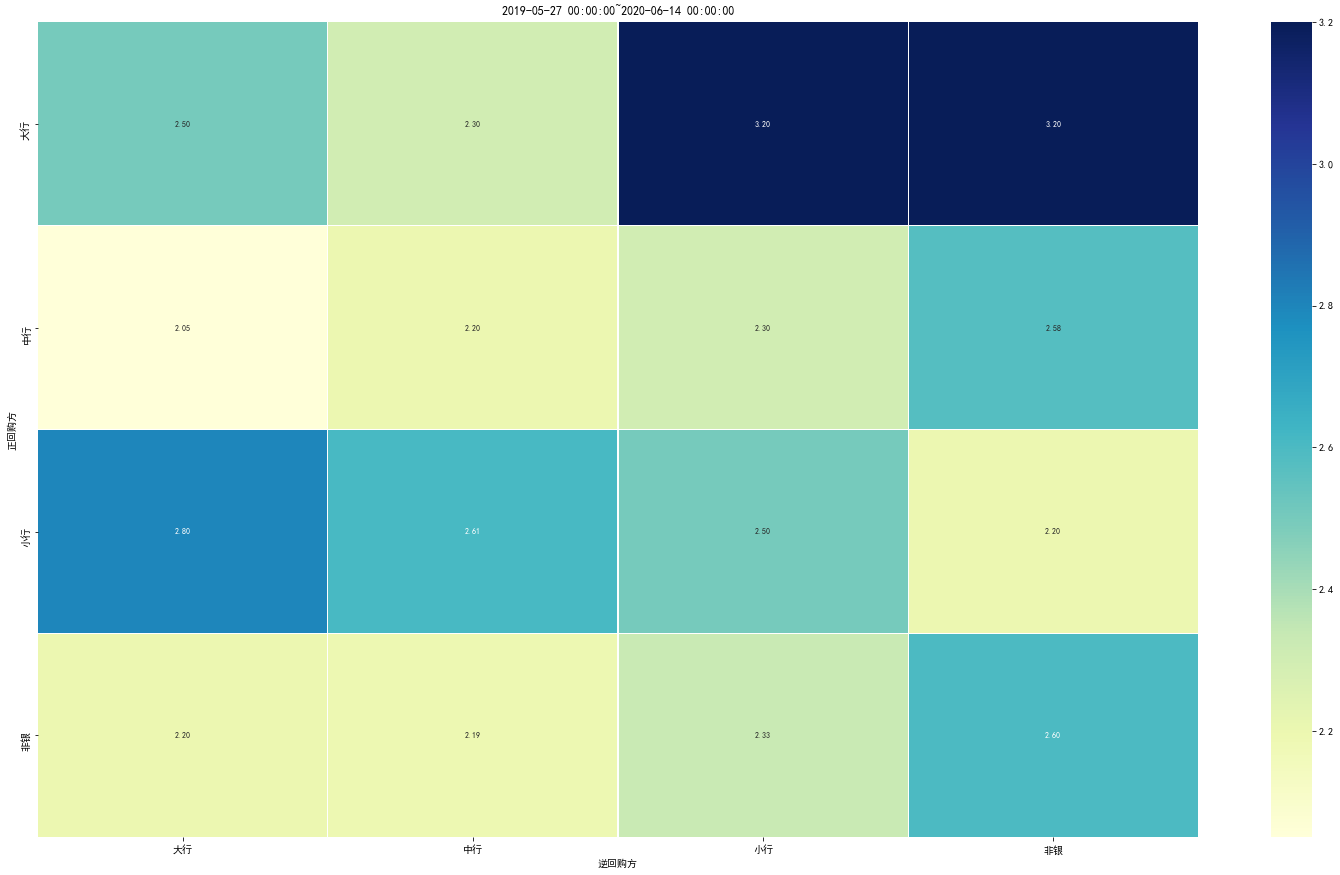

In [59]:
matrixplot("2019/5/27","2020/6/14",flag=False,type="rate")

In [25]:
int(0.5)

0